In [2]:
import numpy as np       
import pandas as pd              
import matplotlib.pyplot as plt   
import scipy.io as sio 
from scipy.signal import medfilt
import rampy as rp
from scipy.signal import find_peaks

In [3]:
# Load your dataset
data = pd.read_csv('./csv_data/combined_spectra.csv')


In [4]:
# Separate the x-axis (Raman shift) and the spectral data
raman_shift = data.iloc[:, 0]
spectral_data = data.iloc[:, 1:2]

In [5]:
df_median = spectral_data.apply(lambda x: medfilt(x, kernel_size=9))

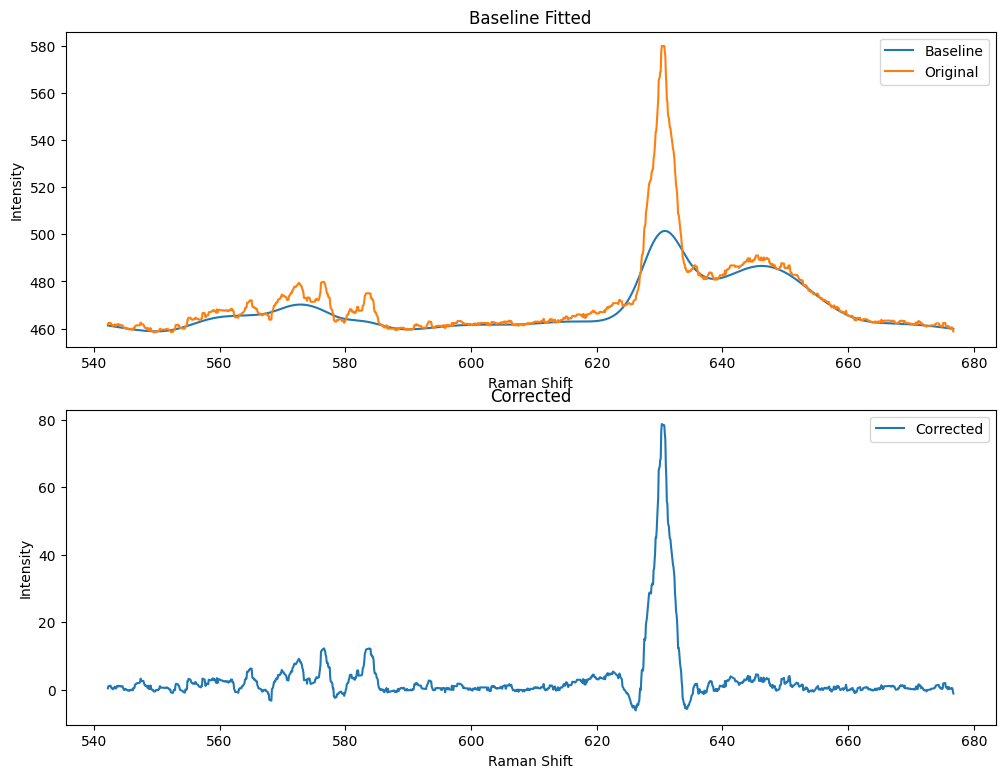

In [6]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12, 9))

roi = np.array([[560, 580],[620, 640]])   # need to define some fitting regions for the spline
for column in df_median.columns:
    y_values = df_median[column].to_numpy()
    ycalc_als, base_als = rp.baseline(raman_shift.to_numpy(), y_values, roi, 'als', lam=10**5, p=0.05)
    # ycalc_poly, base_poly = rp.baseline(raman_shift, y_values, roi, 'poly', polynomial_order=4)
    ax1.plot(raman_shift, base_als, label='Baseline')
    ax1.plot(raman_shift, y_values, label='Original')
    ax2.plot(raman_shift, ycalc_als, label='Corrected')

ax1.set_title("Baseline Fitted")
ax2.set_title("Corrected")
ax1.set_ylabel("Intensity")
ax1.set_xlabel("Raman Shift")
ax2.set_ylabel("Intensity")
ax2.set_xlabel("Raman Shift")
ax1.legend()
ax2.legend()
# plt.tight_layout()
plt.show()

In [7]:
ycalc_als = ycalc_als.flatten()

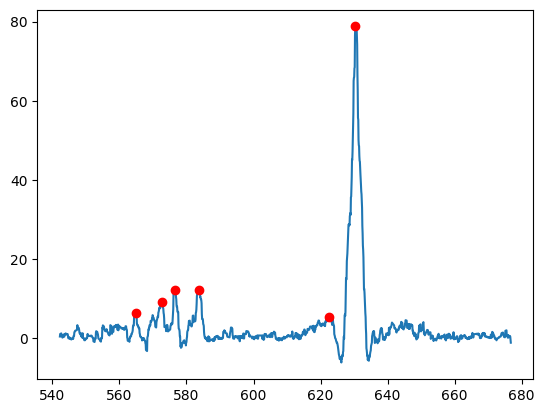

Detected peaks at Raman shifts (cm⁻¹): [564.871 572.604 576.63  583.85  622.628 630.346]
Peak heights: [ 6.31563367  9.21088028 12.29062175 12.27044372  5.41127069 78.75741038]


In [18]:
peaks, properties = find_peaks(ycalc_als, height=5, distance=40)
plt.plot(raman_shift, ycalc_als, label='Corrected')
plt.plot(raman_shift[peaks], ycalc_als[peaks], 'ro', label='Detected Peaks')
plt.show()
# Print peak locations and their properties
print("Detected peaks at Raman shifts (cm⁻¹):", raman_shift.iloc[peaks].values)
print("Peak heights:", properties['peak_heights'])

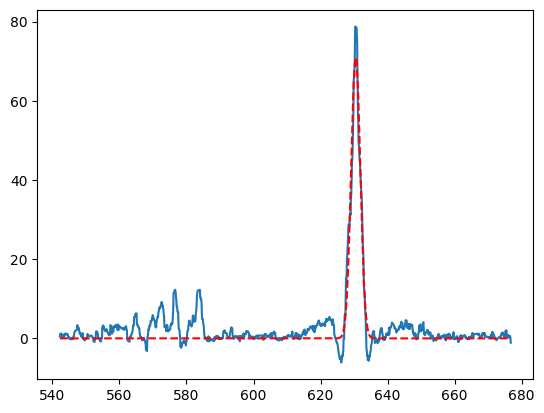

In [9]:
from lmfit.models import GaussianModel
gauss_mod = GaussianModel()

# Fit the Gaussian model to the data
params = gauss_mod.guess(ycalc_als, x=raman_shift)
result = gauss_mod.fit(ycalc_als, params, x=raman_shift)


plt.plot(raman_shift, ycalc_als, label='Original Data')
plt.plot(raman_shift, result.best_fit, 'r--', label='Gaussian Fit')
plt.show()